## UF Desmatadas entre 1988 e 2018

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('terrabrasilis_legal_amazon_22_7_2019_1566487066817.Desmatamento_Legal_Desde_1988_UF.csv', encoding='latin', delimiter=',')

In [3]:
df.head()

,year,area,loi
0,2018,25,TOCANTINS
1,2018,195,RORAIMA
2,2018,1316,RONDÃNIA
3,2018,2744,PARÃ
4,2018,1490,MATO GROSSO


In [4]:
df.tail()

,year,area,loi
274,1988,5140,MATO GROSSO
275,1988,2450,MARANHÃO
276,1988,60,AMAPÃ
277,1988,1510,AMAZONAS
278,1988,620,ACRE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
year    279 non-null int64
area    279 non-null int64
loi     279 non-null object
dtypes: int64(2), object(1)
memory usage: 6.6+ KB


In [11]:
list(df.columns)

['Ano', 'Area', 'UF']

In [12]:
df.rename(columns={'year': 'Ano','area': 'Area_KM', 'loi': 'UF'}, inplace=True)

In [13]:
df.head()

,Ano,Area,UF
0,2018,25,TOCANTINS
1,2018,195,RORAIMA
2,2018,1316,RONDÃNIA
3,2018,2744,PARÃ
4,2018,1490,MATO GROSSO


In [20]:
df.UF.replace({'PARÃ':'PARÁ','RONDÃNIA':'RONDÔNIA','MARANHÃO':'MARANHÃO','AMAPÃ':'AMAPÁ'}, regex=True, inplace=True)
df.head()

,Ano,Area,UF
0,2018,25,TOCANTINS
1,2018,195,RORAIMA
2,2018,1316,RONDÔNIA
3,2018,2744,PARÁ
4,2018,1490,MATO GROSSO


## Desmatamento - Ano x Area

In [21]:
AnosGroups = df.groupby("Ano")["Area"].sum().reset_index()

In [22]:
AnosGroups.sort_values(by= "Ano", ascending=False)

,Ano,Area
30,2018,7536
29,2017,6947
28,2016,7893
27,2015,6207
26,2014,5012
25,2013,5891
24,2012,4571
23,2011,6418
22,2010,7000
21,2009,7464


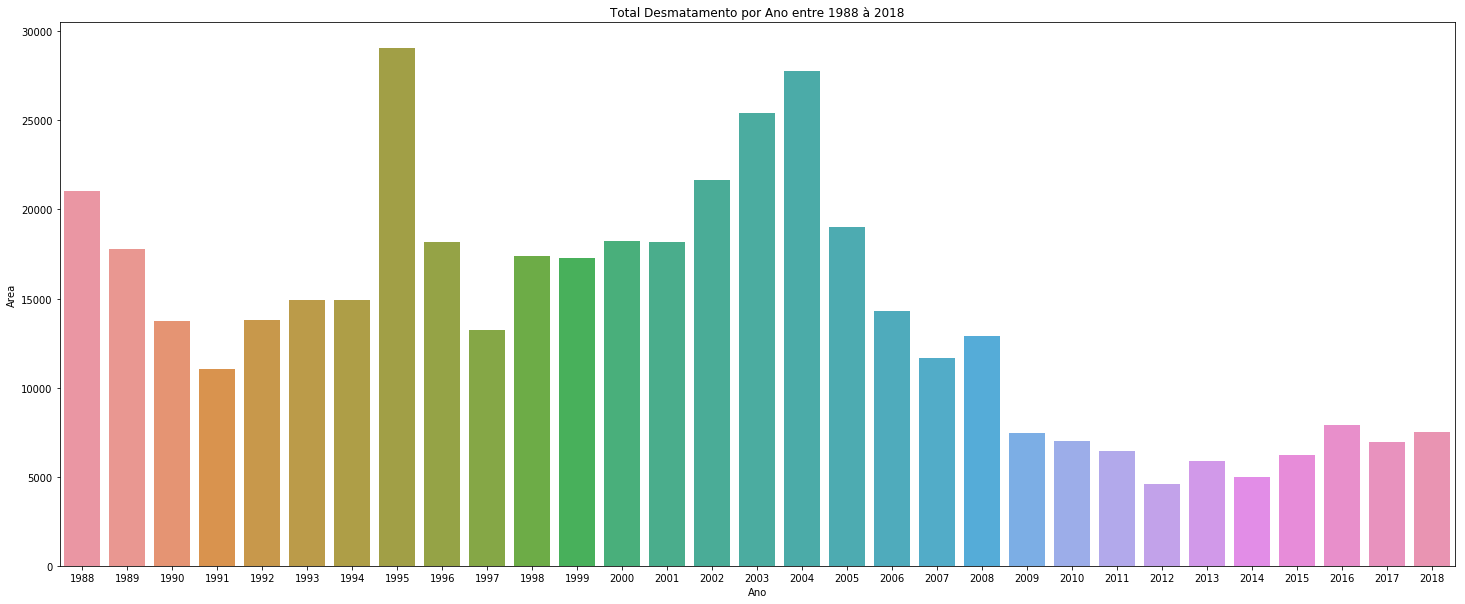

In [29]:
plt.figure(figsize=(25,10))
plt.title("Total de KM2 Desmatamento entre 1988 à 2018")
sns.barplot(x="Ano", y="Area", data=AnosGroups);  

## UF´s mais desmatados por KM2

In [23]:
EstadoGroups = df.groupby("UF")["Area"].sum().reset_index()

In [24]:
EstadoGroups.sort_values(by= "Area", ascending=False)

,UF,Area
5,PARÁ,148303
4,MATO GROSSO,144457
6,RONDÔNIA,60420
2,AMAZONAS,25538
3,MARANHÃO,25180
0,ACRE,14391
8,TOCANTINS,8678
7,RORAIMA,7707
1,AMAPÁ,1583


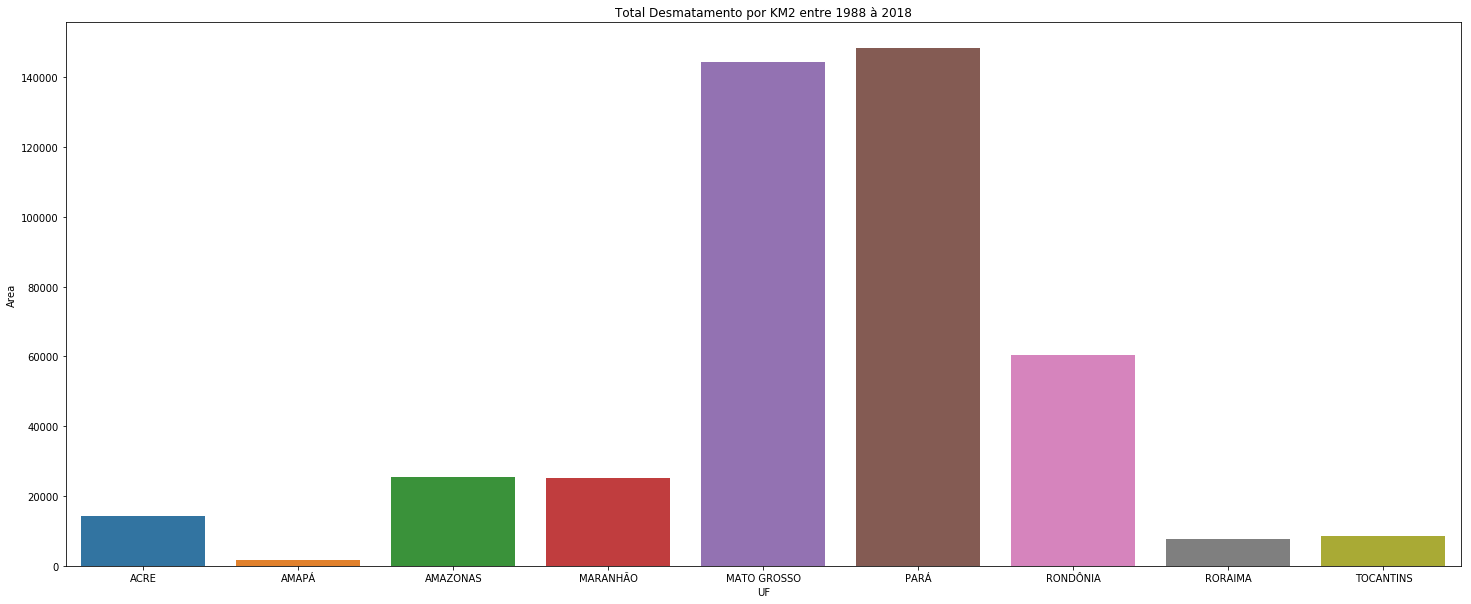

In [27]:
plt.figure(figsize=(25,10))
plt.title("Total de KM2 Desmatado por UF entre 1988 à 2018")
sns.barplot(x="UF", y="Area", data=EstadoGroups);                